Author: R. Bacher  
Modif : F. Chatelain

# Context

MUSE is a new European instrument able to observe the Universe and its
first galaxies in more than 3000 different colors or wavelengths. The study of these
galaxies colors allows the analysis of their chemical and physical
properties, see http://muse.univ-lyon1.fr/spip.php?article155 or the wikipedia page for more details.

But, because of turbulences from the atmosphere, the observations are spatially blurred and it is difficult to attribute precisely a spectrum to a galaxy...

To perform this estimation, we can use an estimation of each galaxy intensity map from the Hubble Space Telescope (HST, https://en.wikipedia.org/wiki/Hubble_Space_Telescope), which is not affected by the atmosphere and thus have a much sharper spatial resolution.

Then, the objective of the project consists of predicting accurately the galaxy spectra based on their HST spatial extension/profile. This yields the following regression task
$$y_\lambda = X \beta_\lambda + \epsilon_\lambda$$
where $y_\lambda$  is the MUSE image for a given wavelength $\lambda$ and the regression matrix $X$ is the mixing matrix deduced from a segmentation map of the  HST image: a column is the image intensity of a single object (galaxy), and the number of columns is the number of objects detected from HST. Here $\beta_\lambda$ is the unknown vector of all the intensity objects, that has to be predicted.

To see most of these galaxies spectra deblending explore https://phd.rbacher.fr/these-app/realDeblend


# Import librairies

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# prettier plots
plt.rcParams['image.cmap']="viridis"
plt.rcParams['image.origin']='lower'
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['figure.figsize']=(10,10)

# Import data

Data are stored in numpy compressed files "npz". Each file is composed of a "cube" extension and "mixM" (mixing matrix) extension. 

A cube is of shape $\lambda \times n_1 \times n_2$ where $\lambda$ is the number of spectral bands (wavelength) and $n_1$ and $n_2$ are the number of horizontal and vertical pixels.

A mixing matrix is of shape $p\times n$ where $p$ is the number of detected galaxies in the scene and $n = n_1 \times n_2$ is the total number of pixels.

In [63]:
gal12 = np.load("./data/galaxie_79.npz")

In [64]:
nobj,npix= gal12['mixM'].shape
lmbda,nx,ny= gal12['cube'].shape
print(gal12['cube'].shape)
print(gal12['mixM'].shape)
print(nobj)

(240, 25, 25)
(12, 625)
12


We can for example plot the cube summed over all spectral bands ("white image")

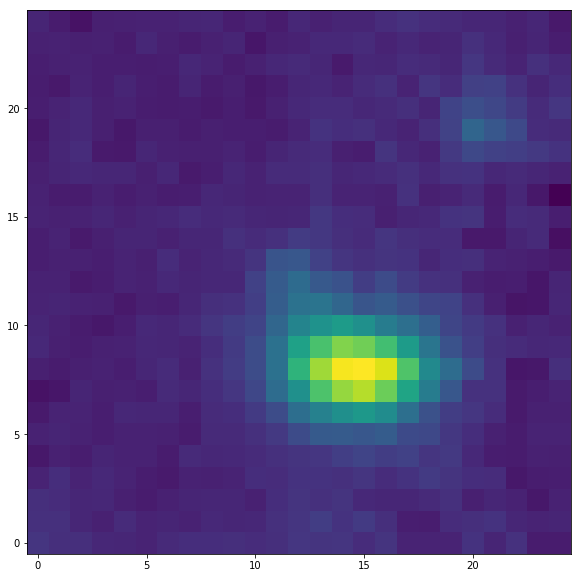

In [65]:
# sum over the 'first' axis (axis=0), i.e. the wavelengths
plt.imshow(np.sum(gal12['cube'],axis=0))

We can also plot the HST intensity map of the fourth object of the scene (note : the object 0 is the background sky)

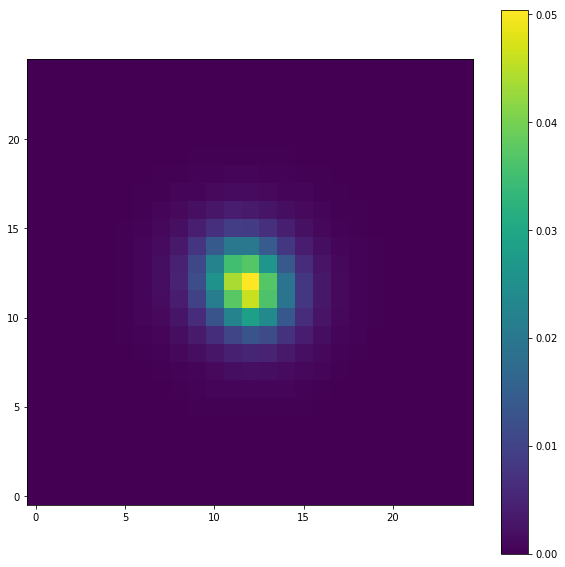

In [66]:
plt.imshow(gal12['mixM'][4].reshape(nx,ny))
plt.colorbar()

Show the HST binary mask of the 4th object

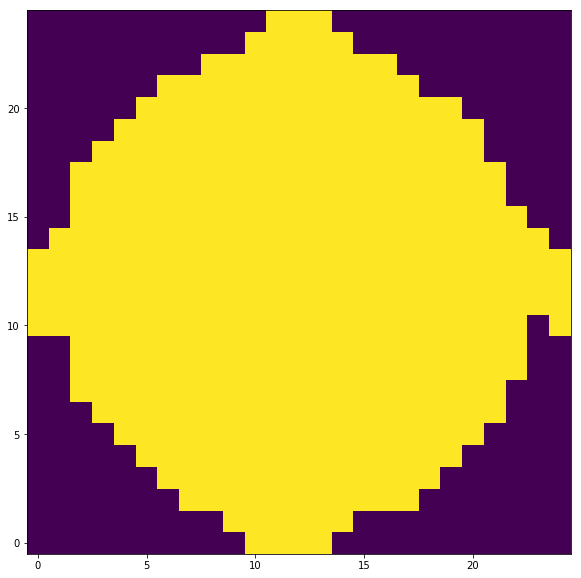

In [67]:
plt.imshow(gal12['mixM'][4].reshape(nx,ny)>0)

# How to separate continuum from emission/absorption lines?

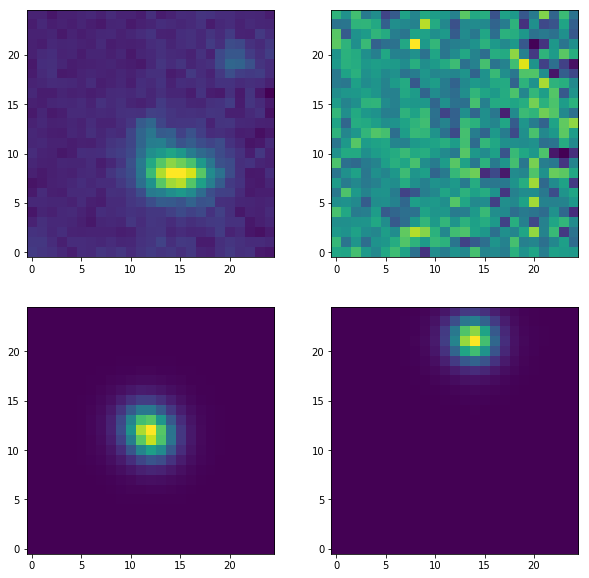

In [68]:

import scipy.signal as ssl

# median filtering to extract spectrum baseline (the continuum)
y_cont= ssl.medfilt( gal12['cube'], kernel_size= (51,1,1) ) 
# residuals are the structures narrower than half of the median 
# kernel size, for instance the (narrow) emission lines
y_lines= gal12['cube'] - y_cont

# plot separetely the 'white' images from continuum and lines
plt.subplot(2,2,1)
plt.imshow(np.sum(y_cont,axis=0))
plt.subplot(2,2,2)
plt.imshow(y_lines[60,:,:])
plt.subplot(2,2,3)
plt.imshow(gal12['mixM'][4,:].reshape(nx,ny))
plt.subplot(2,2,4)
plt.imshow(gal12['mixM'][5,:].reshape(nx,ny))





In [69]:
idxg?

(625, 1)


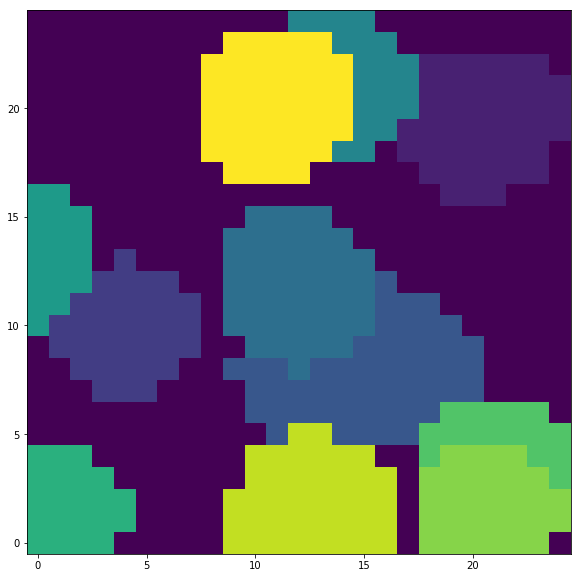

In [70]:
idx= 7
plt.imshow( ( gal12['mixM'][idx].reshape(nx,ny)>gal12['mixM'][idx].max() / 10 ) )
np.sum( gal12['mixM'][idx].reshape(nx,ny)>gal12['mixM'][idx].max() / 10  )

groups= np.zeros( (npix,1)  )

for io in range(nobj):
    idxg= gal12['mixM'][io]>gal12['mixM'][io].max() / 10
    groups[idxg]= io 
    
print(groups.shape)
plt.imshow(groups.reshape(25,25))
    
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn import linear_model

gkf = GroupKFold(n_splits=3)
skf= StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

cv= gkf.split( np.zeros((nobj,npix) ),  np.zeros((npix,1) ), groups) 
#reg = linear_model.LassoCV(fit_intercept=False)
#reg= linear_model.Lasso(fit_intercept=False,alpha=1)


#for train, test in gkf.split(X, y, groups=groups):
    

il, shape (5, (11, 25, 25))
alpha, intercept (0.00034981451424290146, 0.0)
il, shape (6, (11, 25, 25))
alpha, intercept (0.00031114590391807654, 0.0)
il, shape (7, (11, 25, 25))
alpha, intercept (0.00032075261920635264, 0.0)
il, shape (8, (11, 25, 25))
alpha, intercept (0.00026572193217415705, 0.0)
il, shape (9, (11, 25, 25))
alpha, intercept (0.00023615486176710272, 0.0)
il, shape (10, (11, 25, 25))
alpha, intercept (0.00026516140205478322, 0.0)
il, shape (11, (11, 25, 25))
alpha, intercept (0.00027618494431831529, 0.0)
il, shape (12, (11, 25, 25))
alpha, intercept (0.00029646798062873508, 0.0)
il, shape (13, (11, 25, 25))
alpha, intercept (0.00059008855888317759, 0.0)
il, shape (14, (11, 25, 25))
alpha, intercept (0.00058948643504184409, 0.0)
il, shape (15, (11, 25, 25))
alpha, intercept (0.00062326487187232109, 0.0)
il, shape (16, (11, 25, 25))
alpha, intercept (0.00062773758067756502, 0.0)
il, shape (17, (11, 25, 25))
alpha, intercept (0.00062332710625621901, 0.0)
il, shape (18, (1

/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 19 iterations, alpha=2.175e-05, previous alpha=6.513e-06, with an active set of 10 regressors.
  ConvergenceWarning)


alpha, intercept (0.0010181631960825615, 0.0)
il, shape (136, (11, 25, 25))
alpha, intercept (0.0010809645679308237, 0.0)
il, shape (137, (11, 25, 25))
alpha, intercept (0.00079573707956528841, 0.0)
il, shape (138, (11, 25, 25))
alpha, intercept (0.00048640705272858182, 0.0)
il, shape (139, (11, 25, 25))
alpha, intercept (0.00051188642867609107, 0.0)
il, shape (140, (11, 25, 25))
alpha, intercept (0.00041465544282797366, 0.0)
il, shape (141, (11, 25, 25))
alpha, intercept (0.00036198003069356973, 0.0)
il, shape (142, (11, 25, 25))
alpha, intercept (0.00039302479008944299, 0.0)
il, shape (143, (11, 25, 25))
alpha, intercept (0.00040287252552734194, 0.0)
il, shape (144, (11, 25, 25))
alpha, intercept (0.00037196371915266662, 0.0)
il, shape (145, (11, 25, 25))
alpha, intercept (0.00032023462455471624, 0.0)
il, shape (146, (11, 25, 25))
alpha, intercept (0.00028197904511234086, 0.0)
il, shape (147, (11, 25, 25))
alpha, intercept (0.00024965729964972943, 0.0)
il, shape (148, (11, 25, 25))
a

/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 20 iterations, alpha=8.249e-06, previous alpha=3.922e-06, with an active set of 11 regressors.
  ConvergenceWarning)


alpha, intercept (0.0002958745693712896, 0.0)
il, shape (150, (11, 25, 25))


/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 21 iterations, alpha=1.039e-05, previous alpha=5.542e-06, with an active set of 10 regressors.
  ConvergenceWarning)


alpha, intercept (0.00029719304618508572, 0.0)
il, shape (151, (11, 25, 25))
alpha, intercept (0.00029795038282047129, 0.0)
il, shape (152, (11, 25, 25))
alpha, intercept (0.00028808990388968521, 0.0)
il, shape (153, (11, 25, 25))
alpha, intercept (0.00030335048931448501, 0.0)
il, shape (154, (11, 25, 25))
alpha, intercept (0.00030845947017656697, 0.0)
il, shape (155, (11, 25, 25))
alpha, intercept (0.00031698149189284946, 0.0)
il, shape (156, (11, 25, 25))
alpha, intercept (0.00050368507234923969, 0.0)
il, shape (157, (11, 25, 25))
alpha, intercept (0.00053930455402549161, 0.0)
il, shape (158, (11, 25, 25))
alpha, intercept (0.0016588252347790248, 0.0)
il, shape (159, (11, 25, 25))
alpha, intercept (0.0017680782576249812, 0.0)
il, shape (160, (11, 25, 25))
alpha, intercept (0.0017442889460344544, 0.0)
il, shape (161, (11, 25, 25))
alpha, intercept (0.0017517896972677465, 0.0)
il, shape (162, (11, 25, 25))
alpha, intercept (0.0016260501512069534, 0.0)
il, shape (163, (11, 25, 25))
alph

/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


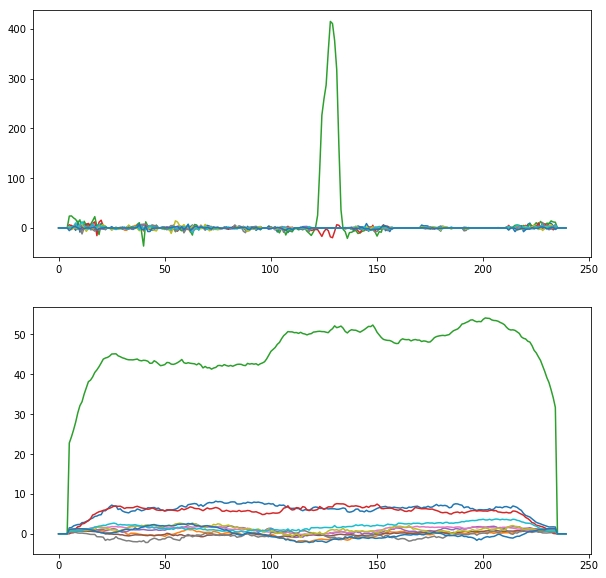

In [71]:

spectres_ls= np.zeros( ( nobj,lmbda) )
spectres_bic= np.zeros( ( nobj,lmbda) )
spectres= np.zeros( ( nobj,lmbda) )
spectres_cont= np.zeros( ( nobj,lmbda) )

winhl=5 ;



for il in range(winhl,lmbda-winhl,1):
    y_slice= y_lines[il,:,:].reshape(nx*ny)
    print("il, shape", format( (il,y_lines[il-winhl:il+winhl+1,:,:].shape ) ) )
    y_subslice= y_lines[il-winhl:il+winhl+1,:,:].reshape(2*winhl+1,nx*ny) 
    y_sumslice= np.mean( y_lines[il-winhl:il+winhl+1,:,:], axis=0 ).reshape(nx*ny) 
    y_contslice= y_cont[il,:,:].reshape(nx*ny) 
    #cv= gkf.split( gal12['mixM'].T , y_slice, groups)
    #reg = linear_model.LassoCV(fit_intercept=False, cv=cv )
    #reg = linear_model.Lasso(alpha=.005)
    cv=  skf.split( gal12['mixM'].T , y_slice, groups) 
    reg = linear_model.LinearRegression( fit_intercept=False,  normalize=True,   )
    regcont= linear_model.Ridge( fit_intercept=False,  normalize=True, alpha= 0  ) 
    multreg = linear_model.MultiTaskLassoCV( fit_intercept=False, normalize=True,  cv= 2 )
    regbic= linear_model.LassoLarsIC( fit_intercept=False,  normalize=True, criterion="bic" ) 
    
    multreg.fit( gal12['mixM'][:,np.where(groups>0)[0]].T ,  y_subslice[:,np.where(groups>0)[0]].T )
    regcont.fit( gal12['mixM'][:,np.where(groups>0)[0]].T ,  y_contslice[np.where(groups>0)[0]] )
    reg.fit( gal12['mixM'][:,np.where(groups>0)[0]].T ,  y_slice[np.where(groups>0)[0]] )  
    regbic.fit(gal12['mixM'][:,np.where(groups>0)[0]].T, y_sumslice[np.where(groups>0)[0]] )
    #reg.fit( gal12['mixM'].T ,  y_slice )
    spectres_ls[:,il]= reg.coef_
    print("alpha, intercept", format( (multreg.alpha_, multreg.intercept_) ) ) 
    spectres[:,il]= multreg.coef_[winhl,:]
    spectres_bic[:,il]= regbic.coef_
    spectres_cont[:,il]= regcont.coef_
    
# Background spectrum
#plt.plot(spectres[0,],color='r')
plt.subplot(2,1,1)
plt.clf
#plt.plot(spectres[7,],color='g',label='1')
#plt.plot(spectres[9,],color='c',label='2')
#plt.plot(spectres[14,],color='y',label='2')

plt.plot(spectres[1:,:].T)
plt.legend()

plt.subplot(2,1,2)
plt.plot(spectres_cont[1:,:].T)





0.0

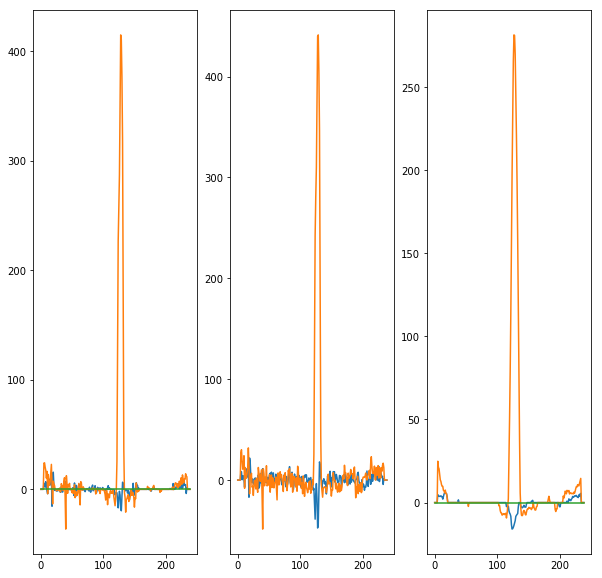

In [75]:
idxoi1= 4
idxoi2= 3


plt.subplot(1,3,1)
plt.plot(spectres[idxoi1,:].T)
plt.plot(spectres[idxoi2,:].T)
plt.plot(spectres[0,:].T)

#plt.plot(spectres[8,:].T)
plt.subplot(1,3,2)
plt.plot(spectres_ls[idxoi1,:].T)
plt.plot(spectres_ls[idxoi2,:].T)
#plt.plot(spectres_ls[0,:].T)
plt.subplot(1,3,3)
plt.plot(spectres_bic[idxoi1,:].T)
plt.plot(spectres_bic[idxoi2,:].T)
plt.plot(spectres_bic[0,:].T)

multreg.intercept_

#plt.legend()


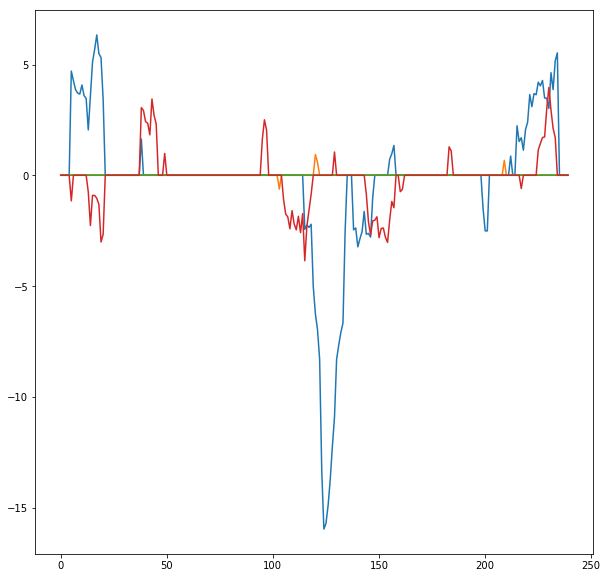

In [73]:
plt.plot(spectres_bic[4,:].T)
plt.plot(spectres_bic[5,:].T)
plt.plot(spectres_bic[0,:].T)
plt.plot(spectres_bic[8,:].T)

